In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood_2, chi_squared

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [3]:
T_data = [c.baryon_temp for c in clusters]

In [4]:
ndim, nwalkers = 2, 10
log_sigma0 = np.random.uniform(low=-40, high=-15, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-19.00743058,  -3.63743949],
       [-19.3411626 ,  -8.2783139 ],
       [-23.79562838,  -9.45279189],
       [-21.65543216,  -5.50692546],
       [-29.51406605,  -5.58604989],
       [-27.98378626,  -2.46010569],
       [-20.46350438,  -7.996524  ],
       [-23.8457448 ,  -4.26589401],
       [-38.6223842 ,  -2.90582868],
       [-19.27700587,  -1.29016472]])

In [30]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_2, args=[T_data, variances, clusters, 'pred_T_b'])

In [31]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-30.40188888  -8.92812292]
[-18.3732657   -5.88129433]
[-21.34136199  -1.3107406 ]
[-32.88930946  -5.48977048]
[-20.82881661  -9.21034948]
[-29.75557373  -4.84293648]
[-37.44190988  -9.28104156]
[-27.90304774  -3.73528596]
[-18.20194415  -2.39235041]
[-16.06760009  -4.00205401]


[-29.40939822  -6.86563   ]
[-21.35791795  -9.04712536]
[-24.60333288  -5.31295273]
[-10.88884066  -1.37998861]
[-18.32939956  -4.98796537]
[-36.3083495   -6.72707006]
[-26.67108178  -1.17513989]
[-8.38170806 -2.82167192]
[-20.43479073  -1.33380592]
[-13.96118829  -2.02372722]
[-18.15557852  -1.44811964]
[-2.72710043 -1.13875671]
[-28.21007152  -7.19335658]
[-18.8277274   -6.49742005]
[-26.62318817  -5.11534572]
[-34.39416825  -8.33905948]
[-29.69958874  -1.09808749]
[-13.50492059  -6.1026002 ]
[-27.22387464  -5.90193977]
[-19.08488917  -7.38541849]
[-34.63937029  -8.64727615]
[-1.65760447 -1.1371316 ]
[-31.74245114  -7.11900896]
[-21.73186398  -1.93991367]
[-20.27231771  -2.47850688]
[-13.83816448  -1.36673606]
[-34.33476494  -7.06444734]
[-20.26018988  -2.52862375]
[-30.86828761  -8.29800208]
[-0.38059538 -1.12375607]
[-10.78429783  -5.90079768]
[-22.47398836  -2.69493848]
[-26.29969125  -4.97524286]
[-15.99839257  -7.4503814 ]
[-27.71301302  -1.14173891]
[-27.9187968   -4.64540112]


[-13.34784668  -2.26446657]
[-12.03117535  -0.86385297]
[-19.74034829  -8.72975591]
[-19.48541826  -8.71666253]
[-19.70952062  -6.30281702]
[-19.88406293  -9.01003595]
[-14.89352062  -1.07556145]
[-19.63451928  -5.29507201]
[-19.58055367  -7.04291021]
[-19.7663668   -8.64725258]
[-19.4653968   -0.50789178]
[-19.63678732  -5.22161479]
[-19.84236804  -9.78153484]
[-19.76257067  -5.47746646]
[-9.13858662 -3.6463223 ]
[-19.82157824  -9.63832749]
[-13.68739581  -1.07956676]
[-19.41199252  -8.49262636]
[-21.85982023  -9.63233267]
[-19.44249537  -0.12491612]
[-19.73837546  -7.19017013]
[-19.6361536   -4.22234741]
[-19.73094618  -7.79320086]
[-19.78168351  -9.52620853]
[-34.26602415  -9.43197296]
[-19.60486182  -7.252791  ]
[-19.49181308  -1.19625943]
[-13.76632133  -0.27517132]
[-19.69725218  -7.70093472]
[-21.4601657   -9.58217259]
[-19.56881325  -3.59695739]
[-19.76129366  -4.41115644]
[-19.60445621  -7.24841962]
[-25.55676796  -0.75663155]
[-19.75650384  -7.37008108]
[-19.62991716  -1.9544

[-16.99263157  -5.99566068]
[-21.12280227  -0.90477542]
[-18.80802334  -0.93263958]
[-13.01448265  -1.56965341]
[-19.75171696  -6.53953169]
[-19.19651582  -4.11742207]
[-16.32800453  -4.00691767]
[-19.75950457  -9.40632085]
[-18.52481636  -1.49372737]
[-19.75545496  -9.6810548 ]
[-19.8530913   -9.37697958]
[-19.74700901  -4.60773138]
[-19.19540485  -4.10831456]
[-19.61382449  -1.96027834]
[-19.75482512  -9.97933903]
[-19.52317577  -0.51353577]
[-18.76926031  -6.03664961]
[-19.84204178  -8.54680031]
[-19.7519025   -6.60783497]
[-19.75874801  -7.70647019]
[-19.76285064  -6.55625677]
[-25.85589461  -2.9034439 ]
[-19.61494684  -3.28114871]
[-13.48002777  -0.25086313]
[-19.6399809   -3.94931559]
[-19.74883555  -6.62228382]
[-19.74572749  -5.08431819]
[-18.87313855  -2.72484705]
[-14.01600315  -0.3423712 ]
[-19.60063849  -5.85771486]
[-19.75972434  -9.46366698]
[-19.71574429  -7.9273567 ]
[-19.63845365  -3.869126  ]
[-19.73349687  -3.14986917]
[-19.74072821  -4.50670747]
[-19.69068984  -5.61

In [32]:
n_steps=1000
sampler.run_mcmc(state, n_steps, progress=True)

[-15.96444163  -2.48677168]
[-20.01014005  -1.77934502]
[-20.44944211  -0.72225486]
[-19.5649482   -4.87918621]
[-19.63981857  -0.91491781]
[-19.64001297  -5.71463681]
[-19.75137923  -6.81883342]
[-19.80423084  -4.85847466]
[-19.75088536  -7.92912432]
[-19.66651703  -5.26534305]
[-19.8139411   -9.11055336]
[-19.63594096  -1.90996571]
[-19.54847083  -3.74335559]
[-19.75323133  -7.59854417]
[-19.55362381  -0.93630109]
[-19.55138813  -1.24455597]
[-19.76460803  -4.84698084]
[-19.65257526  -1.51836234]
[-19.75815712  -7.68500347]
[-19.76181909  -5.69262925]
[-19.05400546  -9.05452261]
[-19.74663772  -1.77288975]
[-19.47420687  -0.60872263]
[-13.74719057  -0.22254538]
[-19.75630196  -8.69434474]
[-19.66481853  -5.57305251]
[-14.98515266  -3.65460218]
[-19.69064358  -3.79492651]
[-19.73776574  -4.2019436 ]
[-25.34732104  -1.47580008]
[-19.75729013  -9.47488504]
[-20.44401181  -9.36882655]
[-19.75665174  -7.25944988]
[-19.55849607  -1.53542001]
[-19.76219292  -1.72512149]
[-19.62355041  -2.41

[-12.24882795  -0.14869656]
[-19.75365306  -7.28524985]
[-19.69836664  -1.60548555]
[-19.48422934  -0.69642316]
[-19.71406924  -4.38096708]
[-19.69208259  -6.17476611]
[-19.6640671   -6.09684352]
[-19.367099    -0.39264043]
[-14.73941614  -0.36599592]
[-19.75386339  -5.60222318]
[-19.51363096  -0.73696623]
[-19.75407702  -7.3767686 ]
[-19.75212634  -1.90384148]
[-19.66980154  -5.32300333]
[-18.9859204   -0.73649581]
[-18.67280179  -7.92512249]
[-18.83036344  -0.50650913]
[-19.50755524  -0.80155359]
[-19.75355319  -4.94176437]
[-19.51298396  -0.71909962]
[-19.60710067  -2.66235945]
[-19.43658723  -0.57286124]
[-19.63887484  -4.41537355]
[-19.75263862  -2.99453709]
[-19.63923628  -5.84363522]
[-19.502087    -0.74273781]
[-18.58261929  -4.29291477]
[-19.09758494  -0.68591006]
[-19.75376512  -6.5016848 ]
[-19.65097149  -0.98003893]
[-19.67886931  -1.50135738]
[-19.76103906  -8.80916248]
[-19.58195002  -3.27202597]
[-19.73009598  -7.17667654]
[-19.63906285  -2.62016133]
[-19.38919207  -0.48

[-19.93388477  -9.21715693]
[-19.35909032  -0.4885094 ]
[-19.75225131  -2.27699934]
[-19.32301975  -0.47158761]
[-19.7570863   -6.34078882]
[-19.95142424  -2.63426187]
[-19.26445657  -0.3842114 ]
[-19.75640527  -6.99263448]
[-20.1462109   -4.01479607]
[-19.39117135  -0.52537772]
[-19.75732212  -4.56655653]
[-26.16742471  -0.7929254 ]
[-19.73763894  -6.10007731]
[-19.55849198  -4.18105201]
[-19.40504846  -0.54035179]
[-19.75176842  -2.09593896]
[-20.22853027  -8.65131927]
[-19.52269568  -2.24617277]
[-19.7523388   -2.30980634]
[-19.2556813   -0.39048505]
[-19.408186    -1.45200933]
[-19.364559    -0.49666172]
[-19.75582608  -7.54700844]
[-19.7546651   -4.28500877]
[-19.9490146   -2.95503413]
[-19.27513573  -0.4334227 ]
[-12.61311139  -0.4733966 ]
[-19.7576126   -5.83704187]
[-19.41342184  -0.54301062]
[-19.75785236  -3.51019537]
[-19.29000121  -0.52311356]
[-19.38558344  -0.66292683]
[-19.74925294  -0.48567429]
[-19.50164237  -3.90991827]
[-19.24813043  -0.32723664]
[-10.98723815  -0.03

[-19.16800472  -1.57648517]
[-19.75835172  -1.44061886]
[-19.75932132  -5.46370973]
[-19.18393288  -0.38678428]
[-19.75180473  -1.76280601]
[-19.01277333  -0.24217582]
[-19.75199634  -3.75181554]
[-19.18073368  -0.38445423]
[-20.32083339  -2.87243104]
[-19.01169291  -0.24183114]
[-18.7850511   -0.09626968]
[-19.79676829  -5.79244601]
[-19.76369853  -3.69669389]
[-19.29460869  -4.18742587]
[-19.48983342  -1.13028292]
[-19.70841456  -2.72722713]
[-21.99380458  -0.31956214]
[-19.75868807  -4.79306289]
[-19.75446375  -2.1951529 ]
[-18.84450436  -0.15505407]
[-13.14315996  -1.24024381]
[-19.28081106  -0.62593157]
[-19.75411704  -1.91839919]
[-20.20569385  -4.57183058]
[-19.76220128  -9.00876314]
[-19.0480901   -0.28784691]
[-21.87931545  -5.9319297 ]
[-18.59361785  -1.52746572]
[-19.01944703  -0.24837345]
[-15.36312341  -0.13899335]
[-19.7585186  -5.5141648]
[-19.74868112  -1.78393005]
[-19.38601724  -0.52451364]
[-19.16619233  -2.04658907]
[-12.826114   -0.1128785]
[-20.31422768  -3.183260

[-19.72470572  -1.46903265]
[-19.29183345  -0.94531554]
[-19.75962788  -4.5948673 ]
[-18.5394848   -0.07807618]
[-19.21594821  -3.68326734]
[-19.59373385  -1.62161535]
[-20.09197167  -2.51133202]
[-14.59897459  -0.05280506]
[-19.63104974  -1.61552609]
[-19.85587413  -1.67444285]
[-19.45822854  -1.38846141]
[-18.917486    -0.20365444]
[-18.17032454  -5.36212673]
[-18.98904052  -0.35821027]
[-18.32563935  -0.18934662]
[-21.30448923  -5.38991538]
[-15.7794223   -0.06002168]
[-19.74530772  -1.0377385 ]
[-19.73376996  -3.22308425]
[-19.23218324  -2.58883712]
[-10.98005599  -0.04968647]
[-19.35999538  -3.55756289]
[-19.38943632  -2.66456315]
[-18.98987125  -0.76374137]
[-19.7380536   -3.50172962]
[-22.03582263  -8.1931058 ]
[-19.745093    -1.86798837]
[-20.31046445  -2.38633289]
[-19.92510899  -5.40823086]
[-15.11916084  -0.12154993]
[-19.76347497  -8.97139613]
[-19.36938047  -1.14489528]
[-18.99403084  -0.61015907]
[-19.71633414  -1.30521051]
[-19.73309637  -2.30098262]
[-19.75758338  -2.26

[-19.0351059   -1.80377373]
[-18.58512583  -0.1119891 ]
[-19.7542931   -3.45689848]
[-19.43203423  -1.18580624]
[-19.19296432  -3.64703906]
[-20.11220895  -2.09663238]
[-19.67609509  -1.30309465]
[-18.3818648   -0.03470388]
[-19.76108327  -1.68109541]
[-15.44458288  -0.07858109]
[-20.41706134  -5.75849887]
[-19.97365778  -1.88194361]
[-18.66402088  -0.31270718]
[-11.66714195  -0.33060519]
[-19.75777002  -9.57114848]
[-18.73947989  -0.0589599 ]
[-19.72504494  -2.37926555]
[-18.80844992  -0.16840447]
[-19.3327217   -5.37861304]
[-20.55447532  -2.44596082]
[-20.01115899  -1.67482843]
[-18.41322192  -2.93847341]
[-19.08443476  -0.81603833]
[-13.44520952  -2.77943523]
[-18.82275282  -0.40793735]
[-14.18429984  -0.51640994]
[-19.23379971  -5.9394929 ]
[-18.82676984  -0.15768759]
[-19.28920582  -1.04171011]
[-18.97182948  -0.92801303]
[-18.64320749  -0.12666149]
[-20.03634111  -4.43636878]
[-19.6919676   -1.49250324]
[-18.5303343   -0.08324865]
[-19.40552918  -6.72979017]
[-19.73835605  -1.91

[-28.31295452  -2.88690788]
[-18.93861007  -0.53449225]
[-20.28150479  -2.01406007]
[-18.22400827  -0.03502906]
[-21.34455589  -1.78562576]
[-20.54878146  -2.07409236]
[-12.28164443  -0.04294779]
[-19.67622978  -1.22424416]
[-19.0059947  -0.513065 ]
[-18.86481016  -0.58020602]
[-14.6305959   -0.58592827]
[-20.44028633  -2.22190075]
[-20.67472173  -2.68355657]
[-19.68092778  -1.25707029]
[-14.98384333  -0.0395672 ]
[-20.79940325  -1.36633522]
[-19.27890071  -1.01938649]
[-16.69258184  -0.85587925]
[-18.76471137  -0.34470013]
[-19.71124057  -1.46887368]
[-18.99063099  -0.72204324]
[-13.97309836  -0.05386733]
[-19.65036107  -1.04349271]
[-19.6166662   -0.99803673]
[-19.07839132  -0.64412629]
[-18.28571885  -7.99410757]
[-20.20442034  -0.09409497]
[-21.78021003  -1.71516425]
[-15.94543873  -0.03351764]
[-15.03569842  -0.78857719]
[-19.75918415  -9.41320818]
[-17.04991423  -1.02466496]
[-18.14653961  -0.02966496]
[-19.72524476  -1.71591719]
[-18.55974799  -0.57106033]
[-19.43729175  -0.8346

[-19.6179966   -0.99989265]
[-19.6211933   -1.00014234]
[-18.84594039  -0.4974518 ]
[-14.07394937  -0.02828863]
[-19.66481002  -1.08499319]
[-19.81888389  -0.82349861]
[-18.1823792   -0.04639863]
[-19.66758723  -1.1401398 ]
[-19.49402767  -0.67674885]
[-20.15078389  -1.36676041]
[-20.39470628  -0.79317713]
[-18.14185626  -0.0305159 ]
[-19.41590575  -0.88199117]
[-24.16558013  -1.29506408]
[-18.1308281  -0.0292655]
[-15.98025356  -0.30364799]
[-18.47378573  -0.19882418]
[-19.64530159  -1.07106727]
[-19.49958158  -0.67607868]
[-18.23734831  -0.04134301]
[-19.11078688  -0.66885314]
[-19.1664171   -0.52114259]
[-18.85059142  -0.35832196]
[-20.0588482   -1.31834055]
[-19.00146531  -0.43219241]
[-18.33439835  -6.96357284]
[-19.64181612  -1.03065465]
[-19.10213999  -0.02781292]
[-19.48075625  -0.64215487]
[-12.66975364  -0.02768098]
[-19.60489182  -0.98296833]
[-20.84432078  -1.3084172 ]
[-15.86831458  -0.3313401 ]
[-20.00269525  -1.25061457]
[-20.36365435  -1.52784015]
[-19.50519562  -0.6539

[-19.45799231  -0.5095833 ]
[-19.45771469  -0.60019544]
[-18.141012    -0.03925566]
[-19.51104805  -0.62571636]
[-19.50063083  -0.75628793]
[-19.36156017  -0.55679424]
[-18.13141483  -0.02967515]
[-20.13810551  -0.89323378]
[-19.08248049  -0.4383871 ]
[-22.35702405  -0.03134515]
[-18.1501086   -0.03111608]
[-19.49369851  -0.73859643]
[-18.7844765   -0.31036931]
[-19.50266368  -0.79609746]
[-19.41458143  -0.58072641]
[-13.31055382  -0.04154694]
[-19.31065578  -0.44594813]
[-20.29030909  -0.96049884]
[-18.64374531  -0.30017597]
[-18.94515929  -0.37745   ]
[-18.30815486  -1.13176046]
[-19.24466114  -0.38011506]
[-19.71635622  -8.80630759]
[-19.42474886  -0.70294961]
[-19.31337638  -0.53986559]
[-19.45787876  -0.66712179]
[-18.55546314  -0.16447377]
[-19.67498639  -0.80938682]
[-18.90319152  -0.02998017]
[-19.69694471  -7.70580101]
[-20.6281067   -1.09854557]
[-19.85515636  -0.57229345]
[-19.66889758  -6.71377495]
[-19.47273947  -0.69677482]
[-18.13952086  -0.03081117]
[-20.56269972  -1.07

[-18.95968627  -0.3413189 ]
[-19.48231088  -8.07657838]
[-18.73784869  -0.2440548 ]
[-19.32986832  -0.49762676]
[-18.97367779  -0.24376277]
[-19.05631485  -0.36300617]
[-18.16762336  -0.06239967]
[-17.94674921  -0.02824991]
[-18.78493439  -0.35270853]
[-17.8362422   -0.02851123]
[-18.1656431   -0.02821563]
[-17.48283964  -0.02832736]
[-19.26043745  -0.39742583]
[-19.18220711  -0.35648969]
[-18.18538972  -0.02921712]
[-17.94754633  -0.1115857 ]
[-19.21342167  -0.37282355]
[-18.37085315  -0.11156518]
[-17.994561   -0.0285573]
[-19.19616218  -0.38343195]
[-18.96492427  -0.36096578]
[-19.27617944  -3.84242921]
[-18.11956304  -0.02894063]
[-18.16817021  -0.15070709]
[-19.52816856  -5.8850556 ]
[-18.12968295  -0.06846351]
[-19.07664336  -0.39956636]
[-19.26552545  -1.51591018]
[-18.67904965  -0.20716872]
[-18.14971333  -0.02903309]
[-17.98905605  -0.02810096]
[-17.04326999  -0.02783304]
[-18.64684763  -0.22173243]
[-20.22745864  -0.83374836]
[-19.61466361  -0.47589941]
[-18.00536526  -0.0323

[-18.0981712  -0.0286015]
[-17.98703853  -0.02794755]
[-17.95773612  -0.02932905]
[-17.99216936  -0.0285381 ]
[-18.13594403  -0.06572385]
[-19.75560942  -9.57571649]
[-19.79043046  -0.40856536]
[-18.54820944  -0.17393631]
[-18.0829396   -0.02835209]
[-18.89768844  -0.22005025]
[-18.79069083  -0.22861335]
[-17.97543863  -0.02789862]
[-17.98623009  -0.02997531]
[-18.15979221  -0.04643435]
[-18.11195011  -0.02871741]
[-17.97761457  -0.02893898]
[-19.55357286  -0.35876608]
[-19.11558766  -0.32244926]
[-18.59470614  -3.14254628]
[-17.99298882  -0.0285139 ]
[-18.06814278  -0.03365556]
[-20.14328932  -0.58637519]
[-18.14029515  -0.02895584]
[-17.97780862  -0.02835579]
[-17.98013891  -0.0288053 ]
[-17.8931477   -0.02843074]
[-18.03674443  -0.02815723]
[-18.03841134  -0.02809882]
[-18.08468155  -0.02850394]
[-18.0328844   -0.04920778]
[-18.49842421  -0.15358534]
[-18.31802888  -1.86535676]
[-19.41461909  -7.68611135]
[-18.00224668  -0.02830395]
[-18.47766848  -0.13253869]
[-19.07698084  -0.3114

[-18.05041743  -0.02905674]
[-18.72434469  -0.14353446]
[-18.04191975  -0.02823848]
[-18.01393286  -0.02841979]
[-18.04209693  -0.02845977]
[-19.04575196  -5.67195595]
[-18.44867799  -0.0969053 ]
[-18.42638219  -0.11459034]
[-18.03347894  -0.027731  ]
[-18.07497882  -0.03055574]
[-18.0419256   -0.02824578]
[-18.01530678  -0.0287938 ]
[-18.20429144  -0.06819026]
[-18.56030939  -0.14626113]
[-18.17793662  -0.78600593]
[-18.04005204  -0.03268293]
[-19.54097496  -8.3799205 ]
[-18.33050484  -0.07828945]
[-18.0329172   -0.02812469]
[-18.43523216  -0.09638372]
[-18.04309297  -0.02855102]
[-17.98224038  -0.0295917 ]
[-18.08765744  -0.04382263]
[-18.07642788  -0.02774104]
[-18.45925869  -0.12145208]
[-18.03347929  -0.02810333]
[-18.05172582  -0.02773527]
[-18.70616598  -2.581835  ]
[-18.20487279  -0.06484186]
[-18.11059942  -0.04029529]
[-18.50407224  -0.14400519]
[-18.04017907  -0.0277891 ]
[-18.01710308  -0.02772718]
[-19.69749475  -9.2519163 ]
[-18.21601575  -0.06734444]
[-18.01509185  -0.02

[-18.03058591  -0.0280707 ]
[-18.03418295  -0.028216  ]
[-18.03635603  -0.02841535]
[-18.60014459  -3.20489491]
[-18.02642752  -0.0286412 ]
[-18.03879625  -0.03036752]
[-17.99252048  -0.02801816]
[-18.01751768  -0.02826729]
[-18.05662409  -0.02834541]
[-18.03658568  -0.02774334]
[-18.01194062  -0.02773433]
[-18.23448799  -1.33835064]
[-18.02484181  -0.02899019]
[-18.02408869  -0.02884792]
[-18.04442874  -0.03194319]
[-18.03391933  -0.0282698 ]
[-17.9965032   -0.02784287]
[-19.1808137   -6.38312874]
[-18.04646615  -0.02846094]
[-17.98619267  -0.02800942]
[-18.01558162  -0.02829641]
[-18.04951593  -0.02774807]
[-18.0294827   -0.02883245]
[-18.04347272  -0.03237901]
[-17.99586326  -0.02780208]
[-18.03204957  -0.02815812]
[-19.27993073  -6.93365447]
[-18.04008916  -0.03092364]
[-18.01597866  -0.02835771]
[-18.02375608  -0.02788858]
[-17.9855179   -0.02797917]
[-18.0279492   -0.02811778]
[-18.01618762  -0.02790651]
[-18.08636863  -0.29486631]
[-18.05321001  -0.02873978]
[-18.03561705  -0.02

[-17.94234642  -0.02770935]
[-19.52643334  -8.32361489]
[-18.05798988  -0.02805057]
[-17.99970517  -0.02795466]
[-18.00598811  -0.0278899 ]
[-17.97094769  -0.02815718]
[-18.02571445  -0.02793999]
[-18.02747844  -0.0282493 ]
[-18.05414023  -0.02769806]
[-18.00181015  -0.02787929]
[-18.0840652   -0.02801864]
[-18.02110045  -0.02823891]
[-17.97440469  -0.02788836]
[-17.97716518  -0.02812286]
[-18.04663252  -0.02793934]
[-18.01570262  -0.02798099]
[-18.04324028  -0.02798449]
[-18.00445741  -0.02792864]
[-17.94062357  -0.02802635]
[-18.09768653  -0.02811589]
[-18.0358821   -0.02798355]
[-17.95304653  -0.02793933]
[-18.05149445  -0.0279265 ]
[-18.00798504  -0.02796829]
[-18.03332673  -0.0282712 ]
[-18.05503494  -0.02767343]
[-17.99572722  -0.02787351]
[-17.97618714  -0.02803978]
[-18.01035989  -0.02797394]
[-18.05739224  -0.02797429]
[-18.09974124  -0.02785392]
[-18.03559546  -0.02798819]
[-18.00306547  -0.02781196]
[-17.99930067  -0.0278769 ]
[-17.91306314  -0.02813473]
[-18.04812879  -0.02

[-18.02474061  -0.02803365]
[-17.99978818  -0.0277647 ]
[-17.99758423  -0.0279073 ]
[-17.97476905  -0.02793962]
[-17.99549288  -0.02788837]
[-18.00505812  -0.0277054 ]
[-18.07169089  -0.02800017]
[-17.9564578   -0.02796732]
[-18.04279531  -0.02779774]
[-18.0470685   -0.02771129]
[-18.0052155   -0.02772769]
[-17.95874915  -0.02792961]
[-18.0532889   -0.02777764]
[-17.92613527  -0.02811559]
[-18.01593418  -0.02784921]
[-19.35103174  -7.32373085]
[-17.9654719  -0.0276733]
[-18.00149725  -0.02772428]
[-17.98169573  -0.02791643]
[-18.03252849  -0.02781741]
[-19.60068397  -8.75250546]
[-18.04915245  -0.02773352]
[-18.03288943  -0.02792586]
[-18.03641073  -0.02788499]
[-18.05505395  -0.02779646]
[-17.98656964  -0.02767686]
[-18.01219201  -0.02779295]
[-17.98087788  -0.0278985 ]
[-19.22275788  -6.65126502]
[-18.05516643  -0.02771898]
[-18.04780799  -0.02799331]
[-18.00880483  -0.02774203]
[-17.98241139  -0.02775151]
[-18.02201187  -0.02782903]
[-17.98935762  -0.02769127]
[-18.01692487  -0.0278

[-17.99862067  -0.02801019]
[-18.00561153  -0.02818294]
[-18.06167224  -0.02777832]
[-18.00282837  -0.02768066]
[-17.99733471  -0.02811091]
[-18.01201554  -0.02816904]
[-18.07739267  -0.02780441]
[-17.94348113  -0.02788267]
[-19.25492497  -6.83407545]
[-18.02295221  -0.02814541]
[-17.97781114  -0.02782066]
[-18.0001091   -0.02814626]
[-18.01561609  -0.02816126]
[-18.06773813  -0.02774696]
[-18.29541084  -1.733531  ]
[-18.00057231  -0.02806695]
[-18.00192694  -0.02817918]
[-19.56625471  -8.5587625 ]
[-17.99400175  -0.02773005]
[-18.0401891   -0.02799206]
[-17.98217122  -0.02789738]
[-18.01406117  -0.02811984]
[-17.99549339  -0.02785827]
[-18.01091621  -0.02819548]
[-18.07053972  -0.0277275 ]
[-18.00996203  -0.027909  ]
[-17.98854838  -0.02794186]
[-18.00654008  -0.02831215]
[-18.01049279  -0.02820567]
[-18.02725839  -0.02772894]
[-17.97065455  -0.02802677]
[-17.99200216  -0.0276854 ]
[-18.01055689  -0.02822363]
[-18.11166179  -0.02772613]
[-17.98464248  -0.02775555]
[-18.03904614  -0.02

[-17.96607318  -0.02835791]
[-18.03266325  -0.02795138]
[-18.04810102  -0.02789232]
[-17.96626963  -0.02810779]
[-19.65187739  -9.00127226]
[-18.01454728  -0.0279453 ]
[-18.03473455  -0.02772249]
[-18.02893571  -0.02805586]
[-18.02679015  -0.02801328]
[-17.92334611  -0.02875332]
[-17.98957615  -0.02818542]
[-18.0321659   -0.02771298]
[-17.98561838  -0.02799724]
[-18.04921167  -0.02771621]
[-18.01131784  -0.02808485]
[-18.03347765  -0.02770478]
[-17.97828117  -0.02826368]
[-18.02741547  -0.02817337]
[-17.96111385  -0.0280853 ]
[-17.96235478  -0.02855522]
[-18.75599018  -4.03629232]
[-18.04579635  -0.33212315]
[-18.03095027  -0.02790014]
[-18.02777219  -0.02815828]
[-18.03569277  -0.02823947]
[-17.98773439  -0.02809063]
[-17.93748266  -0.02828089]
[-19.47072963  -8.0015483 ]
[-18.02859684  -0.02787841]
[-18.05135688  -0.02775943]
[-18.03459695  -0.02794027]
[-18.0591376   -0.02809148]
[-17.96085486  -0.0284114 ]
[-18.08538895  -0.02821851]
[-17.99204291  -0.02794649]
[-18.92237278  -4.88

[-18.04925669  -0.02774253]
[-19.05753147  -5.81005012]
[-17.97656413  -0.0280856 ]
[-17.99096367  -0.02776583]
[-18.00703609  -0.02807122]
[-18.02218724  -0.0277325 ]
[-18.03754298  -0.02871761]
[-18.66624772  -3.56037761]
[-18.0018624   -0.02769721]
[-17.97594366  -0.0280859 ]
[-19.41411157  -7.76729866]
[-18.05725962  -0.02818373]
[-18.03645944  -0.02774391]
[-18.07405935  -0.02946378]
[-17.96065794  -0.02781833]
[-18.02357103  -0.02780565]
[-18.04643988  -0.02774283]
[-18.0076839   -0.02773686]
[-18.07691505  -0.02835634]
[-18.03198797  -0.02865264]
[-18.04852167  -0.41745564]
[-18.08884836  -0.02778038]
[-19.70792534  -9.30765313]
[-18.02761528  -0.02873377]
[-18.02901715  -0.02783286]
[-17.96552417  -0.02795525]
[-18.06649422  -0.02774488]
[-18.06406005  -0.02805754]
[-17.95748097  -0.02781765]
[-18.17287387  -0.9300811 ]
[-18.0371304   -0.02829795]
[-17.96220988  -0.02789855]
[-19.14912519  -6.20736884]
[-18.02089946  -0.0277401 ]
[-18.00369964  -0.02770639]
[-17.92037858  -0.02

[-19.21136976  -6.51362109]
[-18.01420566  -0.02809708]
[-18.02818147  -0.02851216]
[-18.04361256  -0.02820969]
[-19.40388064  -7.59675912]
[-18.00990102  -0.02783913]
[-18.02518445  -0.02781657]
[-18.06649057  -0.02928147]
[-17.99395252  -0.02830537]
[-18.04112957  -0.0288141 ]
[-18.02085144  -0.02782296]
[-18.10372443  -0.02963436]
[-18.05220491  -0.02830413]
[-18.07514419  -0.02772572]
[-18.01221328  -0.02783571]
[-18.01183408  -0.02842398]
[-18.06036883  -0.02975446]
[-17.99046449  -0.02773298]
[-19.68132043  -9.16897904]
[-18.01075572  -0.02786581]
[-18.06541783  -0.02832593]
[-18.02737623  -0.02787168]
[-18.01273566  -0.02889065]
[-18.05906945  -0.02941104]
[-18.03992463  -0.02828387]
[-18.04333261  -0.02778415]
[-18.90643309  -4.95657093]
[-18.07535792  -0.02844462]
[-17.99687524  -0.02822477]
[-18.00486405  -0.02779096]
[-18.04245335  -0.02819521]
[-18.01130449  -0.02785162]
[-18.06856517  -0.02878885]
[-17.98614624  -0.02776209]
[-18.00190138  -0.0281771 ]
[-18.03383408  -0.02

[-18.02290402  -0.02784068]
[-18.00017588  -0.02782238]
[-18.01677027  -0.02835915]
[-19.25936922  -6.84124136]
[-17.99893191  -0.02782372]
[-18.04094236  -0.02861594]
[-18.05542116  -0.02805783]
[-17.99966479  -0.02789453]
[-18.02922416  -0.02788288]
[-17.94918243  -0.02772136]
[-18.38295919  -2.24487593]
[-18.01728397  -0.02783158]
[-17.97293394  -0.02784814]
[-18.01001466  -0.02771709]
[-17.99994928  -0.02792202]
[-19.15547623  -6.31387288]
[-18.01650307  -0.02863357]
[-17.96895109  -0.02771442]
[-18.09752893  -0.02816486]
[-17.99112671  -0.02786294]
[-18.01663797  -0.02794057]
[-17.99488366  -0.02785047]
[-18.02628844  -0.02848881]
[-18.02098682  -0.02767799]
[-17.95987213  -0.02767137]
[-18.00909186  -0.02775867]
[-17.99754538  -0.02788239]
[-18.00692325  -0.02790033]
[-18.72216029  -3.87025508]
[-18.02550596  -0.02786466]
[-19.55451701  -8.48360782]
[-17.97597816  -0.02777216]
[-18.04323651  -0.02797915]
[-18.04675945  -0.02798426]
[-18.04087541  -0.02785491]
[-17.99872261  -0.02

[-17.97767036  -0.02791295]
[-18.01325115  -0.02772862]
[-17.99958379  -0.02832939]
[-18.01407693  -0.02825751]
[-18.80337092  -4.37897453]
[-18.02928075  -0.02771069]
[-18.28891383  -1.52119415]
[-17.99987568  -0.02776033]
[-18.83001034  -4.44112116]
[-18.00037506  -0.02782336]
[-18.00030526  -0.0277596 ]
[-18.01145593  -0.02807295]
[-18.00381962  -0.02771726]
[-18.01703143  -0.02773137]
[-18.01786996  -0.02814145]
[-18.03830557  -0.02815358]
[-18.00958298  -0.02770382]
[-18.02281319  -0.027742  ]
[-18.00901177  -0.02813739]
[-18.00772279  -0.02774708]
[-17.98657197  -0.02799821]
[-17.99718524  -0.02786478]
[-18.01375892  -0.02771926]
[-17.99980496  -0.02813317]
[-18.05860461  -0.02821455]
[-18.00930225  -0.0279169 ]
[-18.00776645  -0.02774707]
[-17.9901972   -0.02829652]
[-17.96427198  -0.02815586]
[-18.00772083  -0.02777228]
[-18.00882112  -0.02807763]
[-18.07903074  -0.02822726]
[-18.71403013  -3.92019111]
[-18.01191339  -0.02785321]
[-18.03024726  -0.02768945]
[-17.98350974  -0.02

[-18.01215268  -0.02771443]
[-18.01428894  -0.02803565]
[-17.98543966  -0.02772841]
[-18.00580698  -0.02804156]
[-18.03763585  -0.02799412]
[-18.0120892   -0.02771141]
[-18.03058837  -0.02767886]
[-18.01873835  -0.02802773]
[-18.04685257  -0.02770708]
[-17.99145641  -0.02778249]
[-18.00050306  -0.02811919]
[-18.03526635  -0.02810958]
[-19.1576293   -6.29986997]
[-18.07171081  -0.02787934]
[-18.02442665  -0.02829837]
[-18.03219323  -0.0277185 ]
[-17.9825347   -0.02781323]
[-18.03576329  -0.02800042]
[-18.01242228  -0.02772724]
[-18.02826655  -0.02771711]
[-19.74858025  -9.53809007]
[-17.97059949  -0.02812745]
[-18.01177982  -0.02769671]
[-18.02082162  -0.02884407]
[-18.38606098  -2.12548264]
[-18.03483786  -0.02798959]
[-18.79900063  -4.28051082]
[-18.02972417  -0.02997376]
[-18.04252312  -0.02770801]
[-17.99393888  -0.02778134]
[-18.92387918  -4.99824654]
[-18.00992608  -0.02776616]
[-18.01654647  -0.02777551]
[-18.03880432  -0.02843534]
[-18.00359289  -0.02775434]
[-17.98564701  -0.02

[-18.00757649  -0.02800136]
[-18.00872765  -0.02838577]
[-18.02771634  -0.02829517]
[-17.9774224   -0.02781477]
[-18.0099585   -0.02808585]
[-18.02873342  -0.02829032]
[-19.15429523  -6.25083157]
[-17.99042996  -0.02848689]
[-17.99252685  -0.02787617]
[-18.02172449  -0.02810828]
[-18.01223386  -0.02836904]
[-18.00662206  -0.02792602]
[-18.02681036  -0.0282995 ]
[-18.01212603  -0.02803198]
[-18.00280998  -0.02841998]
[-19.02332126  -5.56495505]
[-17.99628561  -0.02784142]
[-18.04300642  -0.02830993]
[-18.04929698  -0.02857716]
[-18.689774    -3.81052437]
[-18.01273858  -0.02812574]
[-17.99142371  -0.0277423 ]
[-18.01262504  -0.02854477]
[-17.98430211  -0.02788774]
[-17.99383185  -0.0281119 ]
[-18.03024659  -0.02821121]
[-18.01260685  -0.02853659]
[-17.97086173  -0.0279188 ]
[-18.01142111  -0.02800394]
[-17.98530099  -0.02833799]
[-17.98554905  -0.0278899 ]
[-18.06614815  -0.02859579]
[-17.99297906  -0.02818517]
[-17.9864007   -0.02789736]
[-18.03581421  -0.02810851]
[-18.01396734  -0.02

State([[-18.01358128  -0.02794889]
 [-19.75071113  -9.54804951]
 [-18.04172947  -0.02828287]
 [-18.00693446  -0.02772746]
 [-17.99533082  -0.02770598]
 [-18.01984555  -0.02767921]
 [-17.98687296  -0.02772038]
 [-18.0456975   -0.02788774]
 [-18.0454747   -0.02785151]
 [-18.01601616  -0.02824869]], log_prob=[ -347.68570455 -1315.80476301  -349.01567983  -347.01093654
  -347.19393551  -346.80376389  -347.55526001  -348.08429541
  -347.97811117  -348.67079016], blobs=None, random_state=('MT19937', array([  16764854, 4099049370,  169583744,  761553761, 3954497282,
       3430021922, 3374742232,  720964522, 3200308159,   60152745,
       2021730518, 1988332661,    7419546, 3199264626, 3275069770,
       1503725392, 1656787721,  274343877, 3987460918, 1651297207,
       2634169082,  423128451,  911518712,  979716529, 3582747901,
       3753779070, 4256383926, 3115758884, 3363614438,  229616900,
       2571976935, 1015212107, 3182897946, 4023383440,  511526690,
        328370312, 4270752250, 1

In [33]:
samples = sampler.get_chain(flat=True)

In [28]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: nan


/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/emcee/ensemble.py:542: RuntimeWarning: invalid value encountered in divide
  return self.backend.accepted / float(self.backend.iteration)


(600, 2)


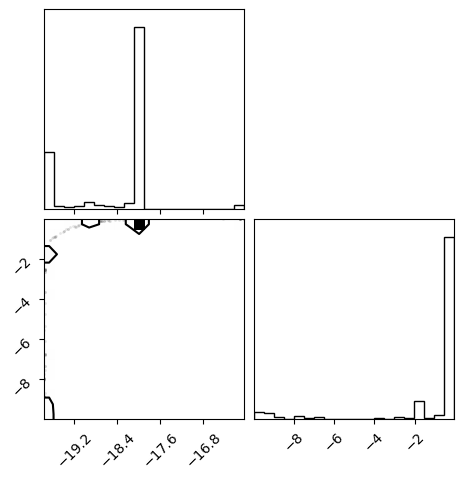

In [21]:
flat_samples = sampler.get_chain(discard=100,thin=15,flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [17]:
flat_samples

array([[-19.7580827 ,  -6.34627351],
       [-19.5961506 ,  -0.83546715],
       [-19.57529876,  -0.7903739 ],
       ...,
       [-18.01983444,  -0.02780444],
       [-18.0417457 ,  -0.02883045],
       [-18.04675602,  -0.02767996]])

In [18]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-18.028131432575222, -0.028003445941809736)

(array([2.0270e+04, 9.0100e+02, 1.0190e+03, 5.5000e+02, 6.6000e+01,
        2.5900e+02, 8.1000e+01, 9.7000e+01, 8.0390e+03, 6.8305e+04,
        1.0000e+01, 8.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 2.7000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.5000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00, 5.0000e+00,
        7.0000e+00, 5.0000e+00, 1.1000e+01, 1.2000e+01, 0.0000e+00,
        4.0000e+00, 3.9000e+01, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.3000e+01, 0.0000e+00, 0.0000e+00, 3.10

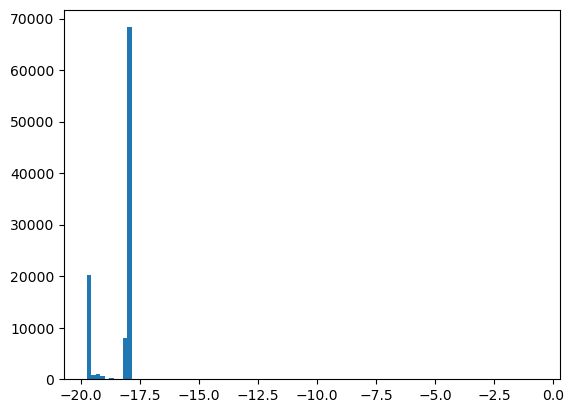

In [19]:
bins=100
plt.hist(samples[:,0], bins=bins)

In [1]:
bins=50
plt.hist(samples[:,1], bins=bins)

NameError: name 'plt' is not defined

In [5]:
from cluster_functions import funr
from scipy.optimize import root
test_cluster=clusters[5]
p0=[-25, -4]

x0 = 1e-5 * u.GeV  # starting estimate (could even do this using T_b_small)
solution = root(funr, x0, args=(test_cluster, p0), method='df-sane').x
solution

/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


array(1.5307764e-05)

In [6]:
ndim, nwalkers = 2, 10
log_sigma0 = np.random.uniform(low=-35, high=-15, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-25.76044259,  -3.17854209],
       [-25.38370259,  -1.98055557],
       [-30.26427862,  -1.54670226],
       [-32.41750003,  -0.26265392],
       [-18.61512738,  -0.82489683],
       [-18.88882925,  -6.65046621],
       [-30.47324472,  -9.80476119],
       [-31.52590089,  -7.99065006],
       [-15.02716666,  -8.11309931],
       [-27.48895908,  -1.05609029]])

In [7]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_2, args=[T_data, variances, clusters, 'pred_T_b'])

In [8]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

You must install the tqdm library to use progress indicators with emcee


[-25.76044259  -3.17854209]
[-25.38370259  -1.98055557]
[-30.26427862  -1.54670226]
[-32.41750003  -0.26265392]
[-18.61512738  -0.82489683]
[-18.88882925  -6.65046621]
[-30.47324472  -9.80476119]
[-31.52590089  -7.99065006]
[-15.02716666  -8.11309931]
[-27.48895908  -1.05609029]
[-32.1459971   -0.30636266]
[-24.4162753   -8.15552233]
[-32.64575607 -13.7104986 ]
[-13.43799116  -9.01303614]
[-30.66074451  -1.28537074]
[-29.70932967 -14.14250398]
[-27.95367796  -3.9009872 ]
[-34.22784457  -0.81544955]
[-31.69585984 -13.85024679]
[-27.21384585  -1.17689867]
[-24.59433471  -0.49618936]
[-17.08907757 -15.59593821]
[-29.65300179 -13.84984527]
[-15.30605422  -7.95042338]
[-30.60026128 -11.51476139]
[-37.49912544 -15.93924302]
[-26.96735352  -0.26930499]
[-28.6602794  -4.7921187]
[-34.94461633  -0.86936616]
[-29.68787734  -0.91493814]
[-16.18815493 -15.6996946 ]
[-12.55444194 -13.87555269]
[-30.76970252  -8.18599228]
[-29.71952465 -14.23337373]
[-28.31662336  -1.72904687]
[-34.58861424  -0.8724

[-28.09346139  -6.53661591]
[-23.09391745 -13.92193255]
[-16.84990121 -15.68363486]
[-22.11754442 -10.49499694]
[-22.49101598 -11.35693939]
[-7.79846408 -7.21732995]
[-21.98457158  -2.78440576]
[-35.67402876 -10.43440986]
[-23.17101493 -15.31587039]
[-23.5256672 -13.8041985]
[-34.20905289  -0.56494902]
[-15.48090214 -19.12281038]
[-24.61339158 -16.25521241]
[-23.40581647 -14.31505092]
[-22.16781717  -1.42309221]
[-22.91776447 -18.5804684 ]
[-31.29885082  -4.17137982]
[-22.32892944  -5.24677874]
[-23.06404894 -15.77180286]
[-19.05764999 -19.34113184]
[-29.99811235  -8.22801485]
[-16.57208907 -16.1078173 ]
[-24.3727246  -13.47926739]
[-28.33716487  -9.26322512]
[-21.53575574  -6.74320553]
[-23.47414213 -16.23043519]
[-22.67181431 -19.00331544]
[-27.69943199 -10.56297135]
[-23.00010933 -15.3364554 ]
[-26.70262731 -12.07338547]
[-14.82197397 -15.27704956]
[-25.86764232 -17.86572096]
[-19.9574915  -18.53945671]
[-19.24226458  -4.37722441]
[-28.57724622 -10.24162805]
[-25.76856905 -17.803103

[-25.91887636  -4.74819543]
[-29.18477297 -13.60253945]
[-10.26603983 -19.01426495]
[ -9.64111451 -13.3022912 ]
[-23.19484216  -1.49287462]
[-16.33327186  -9.54882703]
[ -5.40703393 -11.5599259 ]
[-23.72411866  -6.74850801]
[-36.1945198   -0.42961034]
[-7.67259346 -2.57942343]
[-20.13593415  -8.2145647 ]
[-34.8065545  -13.29066335]
[-27.87751916 -11.04247453]
[-9.37332347 -2.88646532]
[ -5.10655179 -15.06364573]
[-27.11846981 -10.25773622]
[-30.84653144  -8.66527024]
[-17.13126205 -12.07457533]
[ -9.50823235 -13.43959537]
[-27.50876082  -9.83510422]
[-9.74109514 -9.53062251]
[-16.59117015  -0.9438165 ]
[-26.15379296  -9.71524424]
[-9.38503214 -3.80236656]
[-20.97860224  -7.98450968]
[-25.27463074  -7.52203755]
[-29.75659846  -0.31681437]
[-32.16960966 -11.48028435]
[-15.88154514  -0.07371569]
[-21.65200784 -16.35870758]
[-23.07507306 -11.83968561]
[-9.192328   -5.03344624]
[-23.75575498  -9.67814271]
[-25.13385595  -7.57487415]
[-30.78460232 -10.51036056]
[-9.37579246 -3.86139378]
[-18

In [9]:
n_steps=1000
sampler.run_mcmc(state, n_steps, progress=True)

You must install the tqdm library to use progress indicators with emcee


[-16.46226744  -2.4990876 ]
[-26.81984356  -5.34018519]
[-22.6023597  -13.27878916]
[-39.35113633 -10.80752931]
[-11.28288284  -5.82293244]
[-19.15358121 -13.72674961]
[-27.07820089  -7.86813485]
[-30.78751531  -7.50793433]
[-26.2180515   -8.50403716]
[-14.08380251  -7.15719298]
[-32.8428112   -7.16777568]
[-24.59385753  -4.70086062]
[-20.99791733  -2.21364152]
[-25.11832146 -12.41365333]
[-25.64579044 -14.70356254]
[-18.39587741 -14.3179901 ]
[-24.99317907 -12.44910372]
[-12.03865617  -4.87806968]
[-30.47596341  -6.45995107]
[-14.99333405  -0.72809457]
[-17.33477018  -0.70961889]
[-26.52400763 -13.51520802]
[-17.68136663 -14.52039702]
[-20.96119364  -7.58200467]
[-20.62863574  -3.51502957]
[-28.21382974  -8.99321479]
[-39.79956462 -12.28181436]
[-22.56607561  -9.95419983]
[-22.70488881  -2.91381359]
[-27.13423375 -15.20911912]
[-20.18286048  -8.74082722]
[-28.94278437  -1.8670259 ]
[-26.72648701  -8.11630873]
[-22.55748947  -4.90808794]
[-25.49410966 -13.68297443]
[-35.03374366  -9.67

[-18.22335538 -10.44614758]
[-18.76688696 -13.36432033]
[-39.95871848  -1.82398688]
[-26.93368339  -7.72233701]
[-17.253122  -12.5158362]
[ -8.35532505 -18.79092484]
[-14.04454695 -10.00983139]
[-20.08109078 -15.67764419]
[-37.82353355 -13.57111082]
[-25.43848656  -6.72511264]
[-21.47380796  -1.88616163]
[-26.263194    -6.45988335]
[-21.63999057  -8.00724827]
[ -7.91683019 -11.94547253]
[-34.25456221 -19.08901053]
[-36.96418216  -2.76990979]
[-27.26160406 -17.88072986]
[-19.32408565  -1.18943911]
[-14.4744947 -14.4754373]
[-19.57357382  -5.8508393 ]
[-19.11218788  -5.78660144]
[-36.92129809  -2.23089914]
[-22.00084683 -12.71103724]
[-19.31125524  -1.18528078]
[-11.92846165 -13.49317084]
[-14.45459757  -2.20064361]
[-13.74692071  -8.73818099]
[-21.8985272  -16.95406878]
[-37.56718917 -10.34911419]
[-28.15342435 -13.72922812]
[-16.04661969 -11.53002122]
[ -6.33079718 -13.44322422]
[-21.20410374 -12.72172811]
[-38.57300669  -9.98796455]
[-16.8738272   -9.98022698]
[-31.88541407 -14.270285

[-10.75109146 -18.63418542]
[-12.56282637 -18.55712302]
[-27.81454541 -12.05025583]
[-28.7001833   -1.30883962]
[-17.19571874  -8.56013749]
[-25.64864613 -13.33711758]
[-24.82269106  -4.78870082]
[-10.43255329 -18.76213256]
[-6.1141049  -5.62473773]
[-29.76781334 -10.88972828]
[-13.96903449 -13.42747617]
[-32.33554856 -12.14227327]
[-13.5879216  -14.87136144]
[-35.47303051  -8.45365386]
[-10.51113853 -14.44263028]
[-12.38831592 -15.81193405]
[-26.07432683 -17.74280044]
[-12.06555438 -18.08987074]
[-31.35969054 -13.28955281]
[-14.24706939 -12.50137521]
[-27.65805331  -1.8324234 ]
[ -7.33359305 -17.42313297]
[-31.21094793 -13.41487771]
[-11.10773239  -9.8469824 ]
[-16.16663537 -13.81389749]
[-23.8580092  -12.15595569]
[-13.59939865 -17.40865668]
[-9.94054064 -4.95118213]
[-23.32655542  -1.18555604]
[-38.17491023  -8.82428976]
[-30.98417209 -13.21751495]
[-13.72019211 -16.50746179]
[-26.22004896  -4.13177705]
[-16.92823665 -10.79031442]
[-26.97685222 -19.30731914]
[-13.54038642 -17.848924

[-5.99544084 -5.0936074 ]
[-26.4177287   -1.77299674]
[-35.54259428 -13.46750075]
[-16.15460367 -10.62638193]
[-5.89060278 -4.9505715 ]
[ -7.22706934 -16.12652436]
[-32.73120384  -5.09055956]
[-15.21973101 -17.67877612]
[-18.95839474 -13.82028827]
[-29.66606288 -15.50527804]
[-19.89048933  -2.8047468 ]
[-21.98864524  -9.7390019 ]
[-14.42821377 -18.49566147]
[-23.65193154  -6.23993238]
[-14.86254913  -6.22203649]
[-17.79988331 -11.67111996]
[-29.62029715 -15.31180415]
[-10.46620834  -4.97443572]
[-32.35416705  -3.96712435]
[-27.25664012 -15.8071639 ]
[-12.79692455  -8.9014953 ]
[-14.91275544  -2.84626475]
[-9.48977579 -8.03657901]
[ -7.33725028 -16.11617761]
[-23.75691678  -5.48422824]
[-34.29238711 -14.33265813]
[-12.57489417  -7.59565921]
[-14.24785062 -17.43488449]
[-35.82717598 -13.27056701]
[-12.96452479  -5.0702638 ]
[-18.18966778 -10.84587994]
[-19.0711329   -2.26501604]
[-29.25916778 -14.53804275]
[-12.56231917  -7.6771642 ]
[-12.03471048 -13.06341749]
[-28.62017768  -0.80056653

[ -8.38815516 -18.9770776 ]
[-13.56133427  -8.15799882]
[-27.17295946  -8.66832299]
[-29.58426929 -13.21911971]
[-6.95599246 -4.19933086]
[-37.1306358 -10.8694829]
[-34.80909024  -8.74058433]
[-33.07561316 -12.27069064]
[-19.44807756 -11.68600127]
[-13.02818934 -15.91820953]
[-25.98966337 -17.07180354]
[-12.33832849  -7.42503542]
[-16.32105878  -0.22058365]
[-19.37467993  -9.14798899]
[-33.78388058 -12.02594976]
[-24.69949206 -18.2905562 ]
[-20.08946248 -13.71512944]
[-30.35314496 -12.94986657]
[-10.12441334  -5.62842934]
[-9.58646921 -3.722178  ]
[-18.14899472 -10.56325771]
[-32.86353238 -14.97527837]
[-18.83432901  -5.9592541 ]
[-38.00809137  -7.68639326]
[-25.81392133  -8.82312449]
[-22.25260622 -13.04023996]
[-25.28629089 -18.05226719]
[-23.41705302 -12.87034306]
[-37.60366011 -11.10887433]
[-26.41150605 -13.62541044]
[-14.29258921  -8.61491898]
[-16.07833228  -0.09701508]
[-27.18926392 -11.2516034 ]
[-25.37237922 -17.71357576]
[-14.62459464  -7.54156331]
[-27.74083951 -10.59185419

[-14.46947764  -7.20654119]
[-17.81733479 -10.04609112]
[-9.39828244 -5.94700883]
[-14.23056801  -3.55099215]
[-32.65910369 -13.07669015]
[-22.68087086 -10.57781016]
[-14.42672671 -15.7925317 ]
[-15.55619501  -0.10049399]
[-22.03716977 -10.935335  ]
[-13.87676642  -5.63726916]
[-16.37908558 -10.91766801]
[-17.36320851  -2.81353088]
[-11.37126587 -16.58885051]
[-17.25944509  -3.27215642]
[-10.7564626  -16.91561766]
[-14.87770361  -9.55553016]
[-18.67189033  -9.57382866]
[-16.48619875 -12.35114193]
[-13.34712383  -7.39337678]
[-28.57225703 -12.05320838]
[-16.25535517 -14.62656028]
[-14.62131489 -13.10138109]
[-18.12599749 -10.7152356 ]
[-11.26142368 -12.36780926]
[-12.92899147  -8.58991903]
[-35.27260605 -13.7311977 ]
[ -6.69931606 -10.30437181]
[-14.93904965  -6.12158356]
[-12.46020367 -11.34219368]
[-15.99003272 -16.75016269]
[-17.22757639  -9.98500108]
[-12.77142293  -6.2608262 ]
[-16.34193385 -16.99430759]
[-26.21737872 -11.85130819]
[-13.36953186  -4.92863658]
[-14.29438083  -8.2141

[-16.58003089 -13.85367383]
[ -8.79037873 -10.75949863]
[-14.44176966 -16.21853856]
[-21.95695001 -13.56274174]
[-16.76572067 -16.25709872]
[-11.84863874 -19.18372763]
[-18.98735361 -15.25804568]
[-24.03575231  -7.19226377]
[-17.51397641 -11.30541396]
[ -8.7618437  -12.35105297]
[-16.43694221 -16.06287102]
[-18.33292091  -7.75199726]
[ -5.45282749 -11.41033842]
[-11.00948148 -10.80317429]
[-11.52514398 -19.75404594]
[-18.49786824 -13.11324723]
[-27.26173304  -6.85575119]
[-16.13439502  -1.38029056]
[-16.22900736 -15.86136349]
[-16.92466552  -7.97465351]
[-11.52186355 -19.75594857]
[ -8.46439335 -12.02018371]
[-16.3541497  -12.68619766]
[-35.09275526  -5.9569118 ]
[-13.78133759  -9.03507243]
[-17.96894116 -14.42178134]
[-20.56853572  -0.02886717]
[-32.24955988 -14.0941295 ]
[ -6.10774214 -14.35486797]
[-11.38958778 -19.86539058]
[-16.00703662 -12.64557255]
[-14.02466671  -0.05616093]
[-19.58253521  -0.02908075]
[ -7.49464398 -12.28111078]
[-18.81372493  -8.95207758]
[-13.72868879 -12.54

[-11.9095226   -3.35772056]
[-14.5240758  -15.54448146]
[-34.76210254 -10.62288484]
[-5.36857325 -4.05668431]
[-27.81366403  -4.56346979]
[-23.12180882  -7.92291464]
[-14.12943962 -11.17450724]
[-18.98330001  -0.50810061]
[-20.75361869  -0.18895785]
[-31.87435874  -2.6016922 ]
[-14.78906998  -4.81784254]
[-23.12866651  -7.91683555]
[-15.28486988  -6.04353314]
[-15.13647905  -4.56592708]
[-15.06776754 -11.55634301]
[-22.46666527  -8.15647643]
[-32.17754535 -10.74538585]
[-14.04009432 -11.13814977]
[-16.56024944  -4.64015432]
[-17.51478217  -1.74300927]
[-32.24551123 -12.57097212]
[-21.39409658  -0.02772268]
[-31.94780505  -4.57448459]
[-24.45922629  -9.34272653]
[-13.93305424 -16.10691664]
[-11.54744618  -1.84865634]
[-23.72716207  -1.03285688]
[-13.88567773 -11.57776029]
[-15.31238344  -3.89725052]
[-15.86473039  -8.36025977]
[-11.71104105  -2.46213049]
[-28.75142127  -8.43544355]
[-24.74312272 -14.01960512]
[-11.5773489   -5.21936277]
[-34.78416395  -2.75874389]
[-30.01354578  -9.8777

[-20.5570972   -1.48972002]
[-19.69365179  -0.02824188]
[-20.92430135  -0.13842648]
[ -8.90767876 -13.01057889]
[-23.08828863 -14.69396013]
[-29.84107623  -2.58811857]
[-16.90047651 -12.89091747]
[-22.40330086  -3.44521981]
[ -9.65776329 -12.63712177]
[-14.64513126  -4.56765478]
[-19.54958386 -13.66283063]
[-19.61046847  -0.02773829]
[-20.3754032   -0.74735451]
[-33.61036084  -3.5878868 ]
[-16.27479147  -3.39773692]
[-24.00723186 -14.96172745]
[-20.8844362   -0.04929472]
[ -9.85571718 -12.40008801]
[-28.25466518  -3.51970826]
[-17.93055771 -19.45968405]
[-18.47197231  -0.02938131]
[-16.16723501  -7.89572991]
[-19.4682607   -0.02796044]
[-19.1072532   -9.33165434]
[-13.47527981  -6.4807872 ]
[-24.33496663 -16.5267747 ]
[-22.94769876  -3.05669788]
[-27.32610342  -5.91914218]
[-19.63555688  -0.02774013]
[-20.80410906  -0.04681258]
[-11.46404293  -8.97037463]
[-24.11095736 -16.6293601 ]
[-19.92649781  -0.02776145]
[-13.9486878   -6.25126149]
[-29.58099227  -7.39330784]
[-18.97688578 -12.39

[-39.85694447 -14.94962327]
[-13.38141366  -1.75019923]
[-14.04627996 -10.73691305]
[-31.06702495 -10.68138603]
[-19.10162362  -0.02941205]
[-8.58201792 -6.44310635]
[-37.51480069 -14.89502192]
[-19.85117967  -0.02775338]
[-18.38116904 -17.285298  ]
[-30.41831139 -14.58924885]
[-13.05128143 -12.29647737]
[-37.36262617 -16.72602342]
[-19.16929113  -2.70708666]
[-16.0406749   -6.90286087]
[-19.70489238  -0.02774229]
[-31.95142825 -15.06099088]
[-16.65662968  -5.65154454]
[-32.46945125 -14.10893796]
[-17.99785768  -1.53076923]
[-20.77523555  -1.64982221]
[-17.3165015  -1.5231665]
[-18.88841686  -1.5340747 ]
[ -9.86270539 -18.21175396]
[-22.06314618 -11.2597288 ]
[-20.39125927  -0.02784145]
[-17.88520476  -3.38492123]
[-18.06992705  -3.04843564]
[-21.02357883  -0.02784221]
[-7.7137949  -6.72851249]
[-20.93124707  -0.02791947]
[-29.49171086  -8.72734228]
[-19.1003779   -0.02902863]
[-35.2071014  -18.96772217]
[-7.09778975 -7.07274362]
[-15.56359612  -8.84610702]
[-15.07012137  -2.51703305]


[-19.42393423  -0.02797126]
[-29.77700494 -17.62648749]
[-20.47417306  -0.02781114]
[-21.43467403  -0.02796934]
[-32.64964054 -11.62650814]
[-25.17307921  -3.27359263]
[-27.72465545 -18.19136322]
[-24.35036692  -3.95600436]
[-19.78398241  -5.38531797]
[-26.76353423 -11.33652484]
[-34.14408913  -0.49118247]
[-27.48662296 -12.54949911]
[-38.0528535   -0.61418278]
[-24.15493374  -0.13678432]
[-26.45145527  -0.45450504]
[-37.1782263   -1.33380862]
[-36.10869806 -14.62749442]
[-18.52860762  -0.02800835]
[-29.37523179 -17.48974018]
[-20.15067996  -0.02778999]
[-19.84821488  -4.88672261]
[-28.70062938 -14.88768682]
[-32.35398381 -11.00282548]
[-27.18927686  -3.38169407]
[-20.51991253  -2.01654954]
[-35.62676827  -4.31691027]
[-21.12162243  -0.02792561]
[-39.27147876  -0.32817738]
[-28.43857755 -19.52951929]
[-19.53169977  -0.02796836]
[-33.60504902 -12.22521452]
[-25.49229938  -0.43749403]
[-18.58593125  -3.46066497]
[-18.0111193   -0.02800924]
[-32.96656633  -1.00452224]
[-36.28304497 -14.65

[-32.42338558  -2.08047491]
[-39.56710672  -4.85207732]
[-23.05723046  -0.04572633]
[-21.19887708  -0.02778829]
[-37.76232021  -7.18940548]
[-35.73266352  -1.24692061]
[-19.772408    -0.02801161]
[-20.81713583  -2.20060392]
[-30.62899784 -16.24841033]
[-27.77865759  -0.05443288]
[-22.64707091  -0.41952673]
[-20.58622689  -0.0278842 ]
[-20.53636791  -0.04107773]
[-39.36046838  -8.59968242]
[-21.84464042  -0.9348137 ]
[-34.01073672  -0.06592515]
[-21.69943213  -2.18011024]
[-18.19681313 -16.23906085]
[-7.34850432 -0.02796356]
[-32.19995373  -8.73098472]
[-33.53345508 -10.70304119]
[-24.91544572  -2.07534338]
[-9.74792313 -3.61351891]
[-23.49283831 -14.6338426 ]
[-33.60484152  -9.11206055]
[-29.70011608  -9.31147238]
[-38.63356061  -6.73487641]
[-20.27232401  -0.02778639]
[-17.0439996  -16.77229601]
[-14.06172458 -19.78381669]
[-21.1461259   -0.02777441]
[-26.04721497 -12.60784894]
[-13.70323537 -18.72884458]
[-35.56311076  -8.18634438]
[-33.53706095  -0.53233204]
[-19.85165197  -0.027975

[-21.48564909  -6.61717859]
[-23.58725982  -1.02861036]
[-33.61704913 -19.63669289]
[-34.19354618  -4.27475647]
[-17.10083018  -0.02783337]
[-12.2225202   -2.24934301]
[-28.15889294  -4.63677322]
[-20.01558948  -0.43313816]
[-26.00116747  -2.48298577]
[-19.5158898   -0.02771207]
[-27.36562693  -4.44094537]
[-26.96116229  -5.60788782]
[-15.26130852  -0.02792576]
[-6.31194873 -1.82552178]
[-18.249912    -2.87420178]
[-33.23683912 -10.58081816]
[-12.41327263  -0.97793194]
[-31.06682259  -3.5733779 ]
[-21.52886606  -2.31296597]
[-33.94156175 -11.12283697]
[-16.52169169  -1.2282852 ]
[-32.45910594 -18.02646459]
[-25.87385152  -1.92169639]
[-21.58945898  -2.39898957]
[-17.09331813  -0.90681599]
[-29.30913029 -13.50525167]
[-20.5091914   -2.51933437]
[-19.08304904  -0.02779116]
[-18.59663326  -3.2074994 ]
[-26.39414682  -2.01454124]
[-19.03151814  -0.0277364 ]
[-20.3063336   -0.02794928]
[-28.3882143   -2.41138253]
[-28.1075977  -14.12318826]
[-29.43869946  -5.68873778]
[-22.14352816  -1.9312

[-19.15945763  -6.60135278]
[-5.29187329 -0.71733156]
[-16.76492081 -13.65091901]
[-20.06726848  -0.02767861]
[-11.98578115  -5.96024787]
[-8.49926822 -8.51347848]
[-9.7101308  -8.36321845]
[-34.62691603 -13.83746553]
[-19.55973922  -8.34032121]
[-14.40517418  -2.53008235]
[-20.28547606 -11.49318538]
[-10.80171974 -16.54995429]
[-10.56892309  -7.44517934]
[ -7.95852706 -10.20294825]
[-26.24718235 -14.79149475]
[-15.28354941  -3.53681431]
[-13.64405415  -3.54634688]
[-23.5482638  -14.76711138]
[ -7.33795731 -10.85855296]
[-35.61200964 -14.63860763]
[-17.67793569  -1.78039295]
[-26.80771015 -16.12157925]
[-10.00557701 -18.47176603]
[-15.82086383  -0.66890677]
[ -6.40080943 -11.84860859]
[-26.91759002 -15.94011995]
[-17.85991049  -1.93695329]
[-11.37493059 -10.94161695]
[-7.80130246 -3.89918973]
[-7.93963128 -0.02773829]
[-11.57460889 -11.33511618]
[-14.02399266  -0.02773872]
[-14.58741208 -11.03609964]
[-19.6639244   -6.98815027]
[-19.25316528  -0.02774507]
[-31.89244302 -18.2375919 ]
[-

[-30.53971956  -4.02741008]
[-9.55640645 -0.15329873]
[-11.71145475 -15.14621321]
[-18.70851775  -0.0277426 ]
[-38.18635395  -5.42564779]
[-30.68829543  -9.46376138]
[-30.75777952  -3.49360592]
[-15.5757083   -0.23123634]
[-12.08928856 -12.17080131]
[-16.37982027  -0.02771664]
[-25.39503536  -0.0278104 ]
[-36.19841555  -6.0558139 ]
[-31.67571182  -6.31082148]
[-14.88260938  -0.02777445]
[-23.0085364  -13.30443609]
[-29.19886781  -3.42855125]
[-27.6798715   -4.80193663]
[-20.49302261  -0.13380363]
[-15.12048142  -0.02772174]
[-22.87526223  -0.02783097]
[-28.43463861  -4.64778154]
[-25.86359444  -5.66039714]
[-18.18317037  -9.36606521]
[-22.69412252  -2.23738905]
[-24.50486189  -2.25658794]
[-17.07407464  -7.4894804 ]
[-20.83110514  -2.00932844]
[-17.51244979  -7.46839273]
[-35.58685188  -4.82352212]
[-27.15357452  -2.20664672]
[-20.94849123  -1.10485205]
[-25.04834232  -6.20633941]
[-12.64011767  -3.42538416]
[-21.66922678  -7.1086995 ]
[-10.71698651  -0.12691014]
[-29.43426919  -2.6196

[-36.20781297 -13.67950785]
[-20.45840474  -0.89474647]
[-21.3295938 -12.5228852]
[-18.37060934  -0.02769071]
[-12.83964949  -0.04120708]
[-34.0998774   -0.03461366]
[-25.73915314  -4.66724827]
[-20.04363037  -7.09252104]
[-12.76180712  -0.03704085]
[-28.66859913  -7.90932263]
[-13.338649    -0.07767411]
[-21.54704553  -1.12976439]
[-17.84504682  -2.18565531]
[-22.51717025 -17.53778099]
[-32.7081196  -11.00099529]
[-22.71303264  -4.24522945]
[-19.96402686  -0.9283948 ]
[-22.07516395  -0.0293212 ]
[-9.63307168 -4.20249761]
[-20.09323649  -3.15367423]
[-8.81717533 -0.05923218]
[-12.56355998  -0.02794127]
[-39.80180348 -15.41375238]
[-27.38244945  -1.53048014]
[-19.96342626  -0.91805116]
[-20.92564513  -0.45376138]
[-27.16604799  -6.08975255]
[-12.70115695  -0.02779033]
[-20.292591    -3.06025064]
[-14.5932068  -0.824227 ]
[-20.79576162  -6.86389873]
[-39.47278585  -2.77711687]
[-11.31177067  -0.06434019]
[-24.42800475  -4.37646656]
[-6.35458531 -0.02801407]
[-33.38191072  -8.71408016]
[-

[-30.93568058 -16.48124739]
[-16.95664616  -0.07462037]
[-11.75966885  -0.02993432]
[-24.01096775  -8.35399216]
[-12.67316069  -0.0409184 ]
[-32.70765277 -10.93472589]
[-11.70818944  -0.02979394]
[-6.49937165 -0.0283463 ]
[-10.48161582  -0.02769959]
[-16.61541744  -0.07193562]
[-34.75474963 -14.01464259]
[-37.30799616 -16.53730718]
[-13.02818818  -0.04371172]
[-35.7328985  -15.48629599]
[-14.14130398  -0.10067848]
[-2.92170722e+01 -2.76942917e-02]
[-28.64863482 -12.71236878]
[-11.89212964  -0.02946044]
[-36.10938657 -15.27338443]
[-15.99473306  -0.06705215]
[-18.5540204   -4.35642177]
[-9.38951147 -0.02778339]
[-29.29119286 -19.27970149]
[-18.65993461  -0.02769728]
[-36.92575883 -16.13424144]
[-25.95143919 -11.78651567]
[-34.64860643 -14.32346379]
[-5.54549917 -0.02770099]
[-27.95654252 -17.80305068]
[-17.4883984   -5.63461065]
[-26.7954981  -13.14770737]
[-8.93214562 -0.02863985]
[-35.22505627 -14.64389082]
[-20.57346103 -10.90506994]
[-32.44450047 -12.19047438]
[-5.85943553 -0.027788

[-15.05911701  -0.02767957]
[-25.79300713  -6.23729992]
[-27.87931324 -13.79226258]
[-12.77543771  -0.03522404]
[-12.67469085  -0.02775827]
[-38.506694   -11.73253657]
[-7.2027171  -0.02791225]
[-20.74847108  -4.05690019]
[-18.4700885  -12.79903128]
[-11.99089024  -0.03071959]
[-19.02795331  -8.4295398 ]
[-13.95817726  -2.68617844]
[-20.54554366  -0.02767238]
[-10.79787769  -0.02781108]
[-12.10332318  -0.03078551]
[-30.34884014 -16.47283577]
[-15.86988676  -6.18578767]
[-7.01322022 -0.02952503]
[-12.85903923  -0.03577613]
[-14.05216247  -1.30943962]
[-20.02033135 -13.27848311]
[-14.67305631  -5.33546016]
[-6.62440163 -0.02770933]
[-11.34191316  -0.0277634 ]
[-12.30988819  -0.02969108]
[-36.57919457 -11.01184039]
[-9.36216918 -0.03184821]
[-12.81509855  -0.0277595 ]
[-10.13287439  -0.02777535]
[-19.88386407 -16.72147563]
[-36.74687797 -11.07046326]
[-5.78008144 -0.02795097]
[-39.7254999   -8.55537573]
[-14.98413069  -0.02767967]
[-7.16542942 -0.02784429]
[-27.63005363 -14.69778116]
[-11

[-3.13751125e+01 -2.80231590e-02]
[-23.1903505   -7.21725998]
[-5.59060322 -0.19631901]
[-15.45555228  -6.55155478]
[-13.1919515   -0.02781448]
[-25.75686539  -6.31316952]
[-9.71163068 -0.30007739]
[-3.16492667e+01 -2.79954811e-02]
[-10.45571325  -0.02773467]
[-17.01933398  -7.69309545]
[-37.39284314 -12.13384222]
[-34.60363507  -7.29301362]
[-12.17453134  -0.02780246]
[-11.95690898  -0.02783049]
[-9.61262952 -0.02771321]
[-15.44913806  -0.02784116]
[-5.4928826  -0.02774737]
[-38.00928827 -13.20371766]
[-5.76412873 -0.02776882]
[-18.77462785  -0.02786958]
[-11.81627867  -0.02772728]
[-12.91657128  -0.0277213 ]
[-8.10979277 -0.02775174]
[-9.6805341 -0.0277147]
[-16.00681806  -0.02786755]
[-32.43710239  -9.38673971]
[-29.90427537  -5.13611745]
[-11.01856266  -0.51464982]
[-9.69282754 -0.02778602]
[-32.6800031   -6.28666695]
[-30.31838166  -8.15403653]
[-17.03994858  -1.3335671 ]
[-15.16722344  -0.02784727]
[-29.13647615 -16.18826777]
[-6.93418178 -0.02774978]
[-18.03827853  -0.02785094]


[-19.78329001  -0.02778205]
[-12.92409609  -0.02780123]
[-6.89747513 -1.78559546]
[-10.70460407  -0.02767505]
[-12.00841402  -0.35039588]
[-7.02372434 -0.02787021]
[-18.60962516  -4.07210975]
[-22.2177488   -0.02781074]
[-12.67519832  -0.02783583]
[-39.01303653 -16.20652503]
[-10.34112266  -0.02767197]
[-14.46638163  -0.02782228]
[-7.97916131 -0.59554061]
[-29.96495055  -6.68665822]
[-21.53656012  -0.02778202]
[-13.15490643  -0.02767286]
[-5.20071296 -2.21966475]
[-10.06793575  -0.02774535]
[-33.89855662 -10.82536843]
[-26.58386988  -0.02780774]
[-14.86903109  -0.02767341]
[-12.79198931  -0.02770002]
[-39.01381658 -16.20734576]
[-20.78345373  -0.02777448]
[-8.7707347  -0.02776478]
[-12.7934251   -0.02783493]
[-10.48361487  -0.02767317]
[-26.13103895  -8.49610091]
[-25.51545061  -0.02782117]
[-14.19320532  -0.02768497]
[-10.57634892  -0.02779627]
[-12.2600885   -0.02767327]
[-25.65288571  -8.2098927 ]
[-12.66916728  -0.02779727]
[-7.9387355  -3.02160298]
[-16.13771661  -3.0015894 ]
[-13

State([[-1.61456110e+01 -2.76743895e-02]
 [-1.09190487e+01 -2.77496644e-02]
 [-7.42083204e+00 -2.78072386e-02]
 [-1.36429712e+01 -2.78147620e-02]
 [-2.85136444e+01 -6.63159987e+00]
 [-9.88624899e+00 -2.78115774e-02]
 [-9.06154539e+00 -1.74491588e+01]
 [-1.77994427e+01 -2.76912660e-02]
 [-1.16682768e+01 -2.76953803e-02]
 [-3.60685388e+01 -1.68036268e+01]], log_prob=[ -538.95118245  -540.0093095   -540.81968314  -540.92564596
 -7131.62552308  -540.88079089 -7131.62552308  -539.18871276
  -539.24608363 -7131.62552308], blobs=None, random_state=('MT19937', array([2493957244,  848819015, 3370623116,  130888847,  682954940,
       2085766398, 2407696203, 3893176023, 3364221237,  812675578,
       3014364567, 4287863684, 4126473498,  338002494, 3244646247,
       2794994475, 1004447663, 2000714407, 2260454867,   72312213,
       3076845177, 1230185028, 2155144819, 1090337558,  190043734,
       3091375123, 4274096458, 1546613753, 2472856569, 1262066018,
       2572261458, 1642423741, 37207969

In [10]:
samples = sampler.get_chain(flat=True)

(10000, 2)


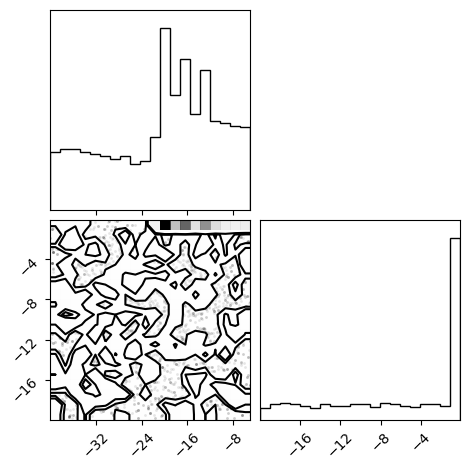

In [11]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)